In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [4]:
# load data
np_data = np.load("data/dataRS.npy")
df = pd.DataFrame(np_data[:,:-1], columns=["freq","aoa","chord","vel","thickness"])#,"noise"])
df.tail()

,freq,aoa,chord,vel,thickness
1498,0.116162,0.702703,0.272727,0.199495,0.904111
1499,0.148990,0.702703,0.272727,0.199495,0.904111
1500,0.191919,0.702703,0.272727,0.199495,0.904111
1501,0.242424,0.702703,0.272727,0.199495,0.904111
1502,0.308081,0.702703,0.272727,0.199495,0.904111


In [5]:
# correlation matrix
df.corr().style.background_gradient(cmap='coolwarm')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [6]:
# perform PCA
latent_dim = 3
pca = PCA(n_components=latent_dim,)
pca_results = pca.fit_transform(df)
print('Shape before PCA: ', df.shape)
print('Shape after PCA: ', pca_results.shape)

Shape before PCA:  (1503, 5)
Shape after PCA:  (1503, 3)


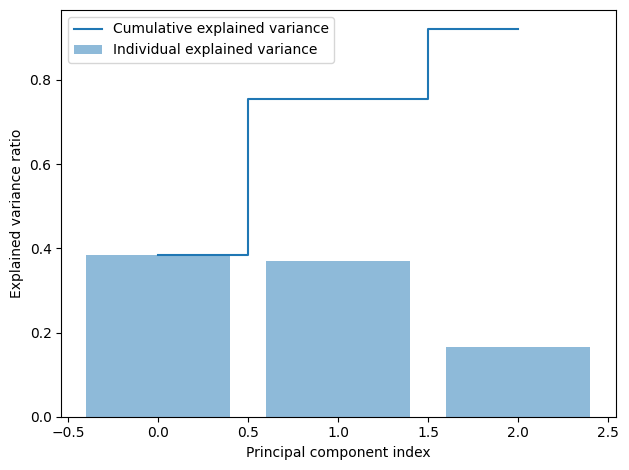

In [7]:
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
fig1 = plt.figure()
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
fig1.savefig("archive/PCA_covringPlot.png")
fig1.savefig("archive/PCA_covringPlot.pdf")

<BarContainer object of 3 artists>

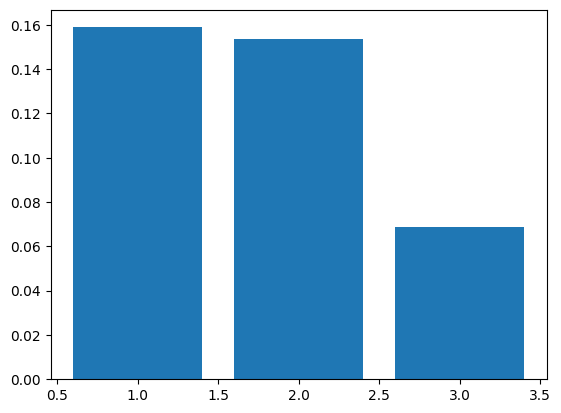

In [6]:
# show variance of pca features
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

In [7]:
# correlation matrix
pd.DataFrame(pca_results).corr().style.background_gradient(cmap='coolwarm')

,0,1,2
0,1.000000,-0.000000,0.000000
1,-0.000000,1.000000,-0.000000
2,0.000000,-0.000000,1.000000


In [8]:
components = pca.transform(df)
projected = pca.inverse_transform(components)
print(projected.shape)
print(components.shape)

(1503, 5)
(1503, 3)
